In [1]:
using PyPlot

INFO: Recompiling stale cache file /home/gibson/.julia/lib/v0.6/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/gibson/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


In [2]:
# forward euler explicit time stepping
function euler1D(odefun, initialcondition, starttime, endtime, stepsize)

    y0 = initialcondition;
    timespan = collect(starttime:stepsize:endtime)
    yapprox = zeros(length(timespan));
    Nt = length(timespan)-1
    steps = collect(1:Nt);

    yapprox[1] = y0

    for n in steps
        k = odefun(timespan[n], yapprox[n]);
        yapprox[n+1] = yapprox[n] +k*stepsize
    end

    hcat(timespan, yapprox)

end

euler1D (generic function with 1 method)

In [3]:
# Example 1:
#
#    y'(t) = y
#      y_0 = 1
#
a = 0.5
f(t,y) = a*y
y_0 = 1.0

t_beg = 0.0
t_fin = 5.0

5.0

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] y_true(::Array{Float64,1}) at ./In[4]:4
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ

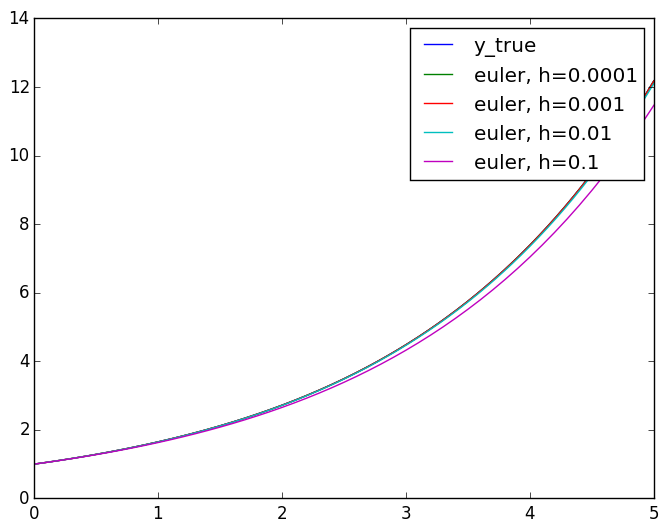

.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 8


PyObject <matplotlib.legend.Legend object at 0x7f0bffe56b10>

In [4]:
# Plot analytic solution
clf()
title("y'(t) = y")
y_true(t) = y_0*exp(a*t)
h = 0.1
t = collect(t_beg:h:t_fin)
clf()
plot(t, y_true(t), label="y_true")

# Plot solution from Euler's method for
#    h = 0.1, 0.01, 0.001, 0.0001
for h in logspace(-4, -1, 4)
    y_euler = euler1D(f, y_0, t_beg, t_fin, h)
    plot(y_euler[:,1], y_euler[:,2], label="euler, h=$h")
end

legend()

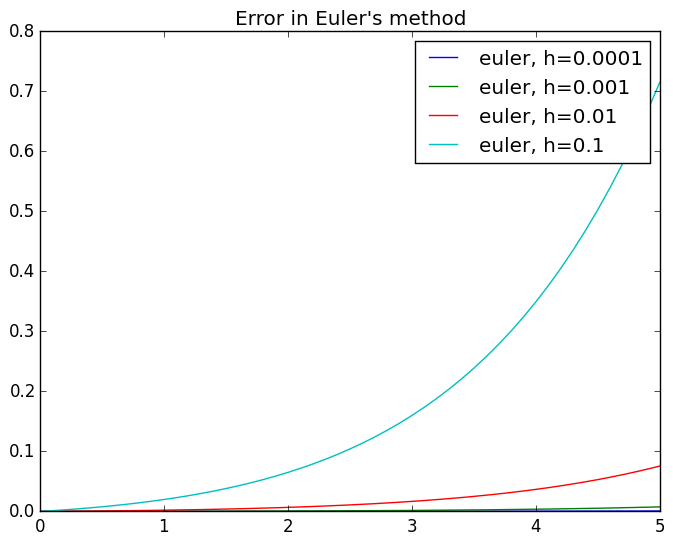

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[5]:6 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[5], in expression starting on line 3


PyObject <matplotlib.legend.Legend object at 0x7f0bf9f9ed90>

In [5]:
clf()
title("Error in Euler's method")
for h in logspace(-4, -1, 4)
    y_euler = euler1D(f, y_0, t_beg, t_fin, h)

    plot(y_euler[:,1], abs(y_true(y_euler[:,1]) - y_euler[:,2]), label="euler, h=$h")
end

legend()

In [6]:
# Example 2:
#
#     y'(t) = 2 - 2y - exp(-4t)
#      y_0  = 1

f(t, y) = 2 - 2*y - exp(-4*t)
y_0 = 1.0

t_beg = 0.0
t_fin = 5.0

5.0

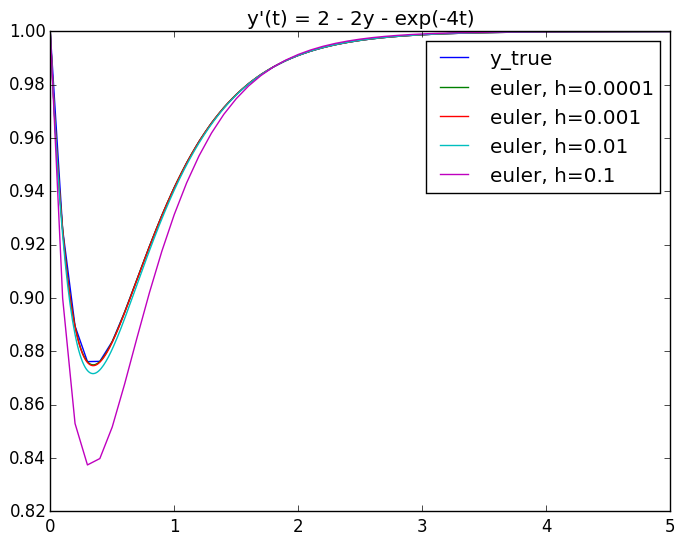

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] y_true(::Array{Float64,1}) at ./In[7]:4
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[7], in expression starting on line 7


PyObject <matplotlib.legend.Legend object at 0x7f0bf9f0ae10>

In [7]:
# Plot analytic solution
clf()
title("y'(t) = 2 - 2y - exp(-4t)")
y_true(t) = 1 + 0.5*exp(-4*t) - 0.5*exp(-2*t)
h = 0.1
t = collect(t_beg:h:t_fin)
plot(t, y_true(t), label="y_true")

# Plot solution from Euler's method for 
#     h = 0.1, 0.01, 0.001, 0.0001
for h in logspace(-4, -1, 4)
  y_euler = euler1D(f, y_0, t_beg, t_fin, h)

  plot(y_euler[:,1], y_euler[:,2], label="euler, h=$h")
end

legend()

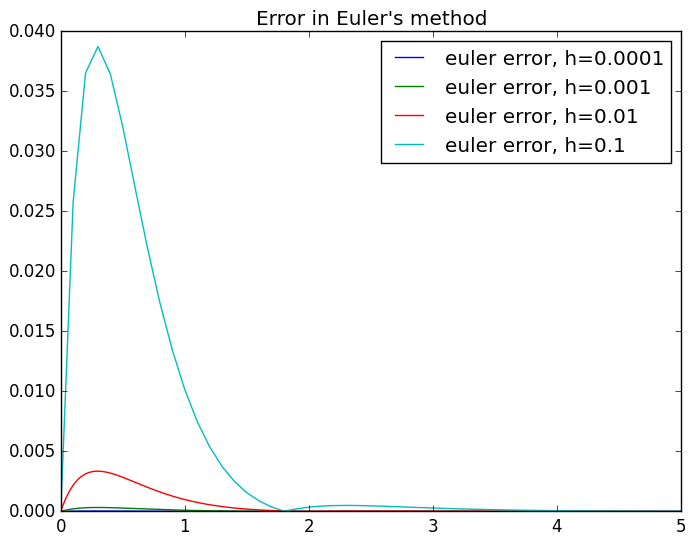

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[8]:7 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[8], in expression starting on line 4


PyObject <matplotlib.legend.Legend object at 0x7f0bf9df06d0>

In [8]:
# Plot local truncation error from Euler's method
clf()
title("Error in Euler's method")
for h in logspace(-4, -1, 4)
  y_euler = euler1D(f, y_0, t_beg, t_fin, h)

  plot(y_euler[:,1], abs(y_true(y_euler[:,1]) - y_euler[:,2]), label="euler error, h=$h")
end

legend()

In [9]:
# Example 3:
#
#    y'(t) = y - 0.5 exp(t/2) sin(5t) + 5 exp(t/2) cos(5t)
#     y_0  = 0

f(t, y) = y - 0.5*exp(t/2)*sin(5*t) + 5*exp(t/2)*cos(5t)
y_0 = 0

t_beg = 0.0
t_fin = 10.0

10.0

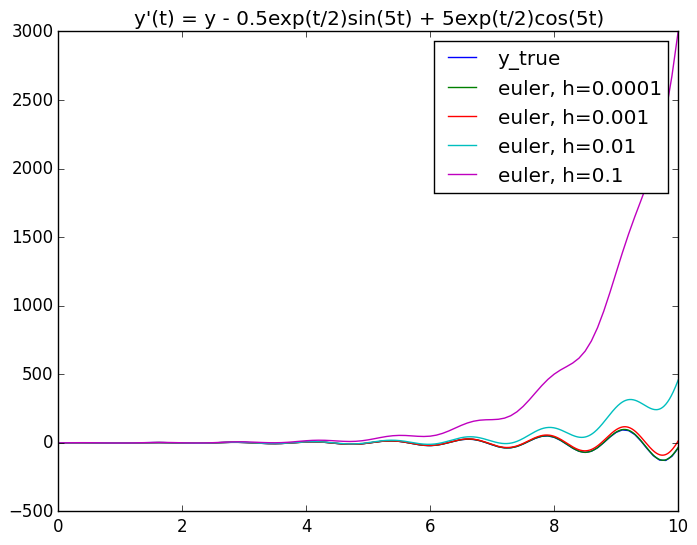

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] y_true(::Array{Float64,1}) at ./In[10]:4
 [4] include_string(::String, ::String) at ./loading.jl:515
 [5] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [7] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[10], in expression starting on line 6


PyObject <matplotlib.legend.Legend object at 0x7f0bf9d51b50>

In [10]:
# Plot analytic solution
clf()
title("y'(t) = y - 0.5exp(t/2)sin(5t) + 5exp(t/2)cos(5t)")
y_true(t) = exp(t/2) .* sin(5t)
t = collect(t_beg:0.1:t_fin)
plot(t, y_true(t), label="y_true")

# Plot solution from Euler's method for
#    h = 0.1, 0.01, 0.001, 0.0001
for h in logspace(-4, -1, 4)
  y_euler = euler1D(f, y_0, t_beg, t_fin, h)

  plot(y_euler[:,1], y_euler[:,2], label="euler, h=$h")
end

legend()

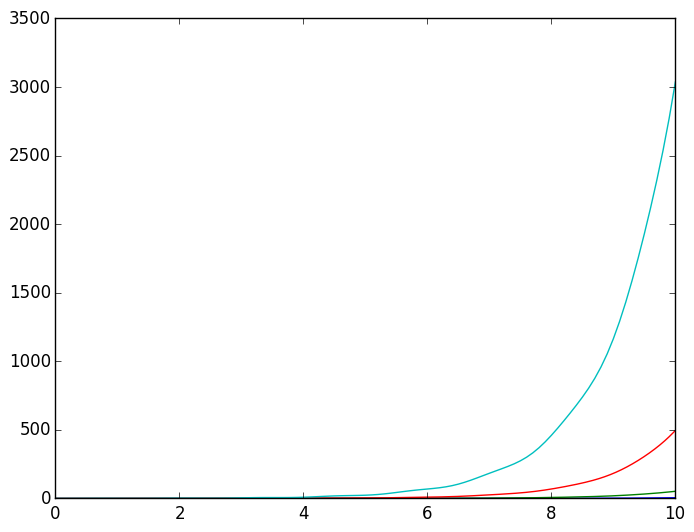

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] macro expansion at ./In[11]:6 [inlined]
 [4] anonymous at ./<missing>:?
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /home/gibson/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/gibson/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/gibson/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[11], in expression starting on line 3


In [11]:
title("Error in Euler's method")
clf()
for h in logspace(-4, -1, 4)
  y_euler = euler1D(f, y_0, t_beg, t_fin, h)

  plot(y_euler[:,1], abs(y_true(y_euler[:,1]) - y_euler[:,2]), label="euler error, h=$h")
end